# ST115 Managing and Visualising Data

## Lecture 11: Visualisation for explanatory purpose

### 2022/23 Lent Term

## So far...

<center><img src="figs/ds_process_2.png" width="600"/></center>

For this course, our end product is to report/communicate the analysis result to the stakeholders.

## Today's plan

* Data visualisation for explanatory purpose
* Interactive visualisation (moved to the workshop)
* Git and GitHub (optional)

# Visualisation for explanatory purpose

## Goals of explanatory visualisation

* Present data

<center><img src="figs/covid_both.png" width="1200"/></center>
     
Plot from https://coronavirus.data.gov.uk

## Goals of explanatory visualisation (continue)

* Provide evidence and support

<center><img src="figs/economist.png" width="250"/></center>
    
Instagram post from Economist.

## Goals of explanatory visualisation (continue)

* Influence and persuade

<center><img src="figs/lockdown.jpeg" width="300"/></center>
    
Figure from [Nature](https://www.nature.com/articles/d41586-020-01003-6).

## Observations from the examples

For plots that are for explanatory purpose, they are used to show what the authors want you (the audience) to see. 
* Some features of plots for explanatory purpose:
    * Attractive and aesthetically pleasing
    * Use annotations and colours to highlight what they want you to see
    * Use caption to guide readers 
        * What the plot is about
        * How readers should understand the plot

## Why visualisation for explanatory purpose?

* Draw attention 
* More attractive and aesthetically pleasing
* Easier to understand, more intuitive to people

## Effective visualisation

* Have graphical integrity and be truthful
* Clear about what you want to show. Do not bury the lead
    * Choose the right graphic form
    * Arrange the graphic components
    * Keep it simple
    * Use captions and annotations to guide your audience
    * Use colour appropriately (will talk about it in the workshop)

## Have graphical integrity and be truthful

Plots should be accurate and not misleading.
* Intentionally misleading people is ethically unacceptable
* Any misleading/inaccurate plots will undermine your creditability

Be honest to yourself and your audience.

## Have graphical integrity: Counter example 1

The plot gives the impression that the tax rate will increase by a few folds after the tax cut expires:

<center><img src="figs/wrong_bar.webp" width="500"/></center>

* Issue: non-zero base when using bar chart
    * Bar chart uses height / area to represent the data. Therefore, in general 0 should be included (or we can say 0-base should be used)

Examples from [simply statistics](https://simplystatistics.org/posts/2012-11-26-the-statisticians-at-fox-news-use-classic-and-novel-graphical-techniques-to-lead-with-data/).

## Counter example 1 (continue)

Correct plot:

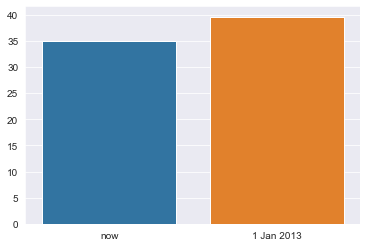

In [1]:
# import packages we need to use later as well
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style('darkgrid')
sns.barplot(x = ['now', '1 Jan 2013'], y = [35, 39.6]);

## Have graphical integrity: Counter example 2

The plot is not just misleading but wrong:
<center><img src="figs/wrong_line.webp" width="700"/></center>

8.8 is lower than 8.6!

## Choose the right graphic form

The purpose of visualisation affects how you should shape the information.
* Illustrative example: Want to show how music preference has changed in two decades. Data:

In [2]:
music_df = pd.DataFrame({1994: [0.35, 0.25,0.2,0.1, 0.05, 0.05],
                   2014: [0.4, 0.23,0.22,0.1, 0.03, 0.02]},
                 index = ['Hard Rock', 'Samba', 'Hip-Hop', 'Reggae', 
                          'Country', 'Classica'])
music_df

,1994,2014
Hard Rock,0.35,0.40
Samba,0.25,0.23
Hip-Hop,0.20,0.22
Reggae,0.10,0.10
Country,0.05,0.03
Classica,0.05,0.02


## Illustrative example 1: See the trend

Can you see how music preference has changed with the use of a pie chart?

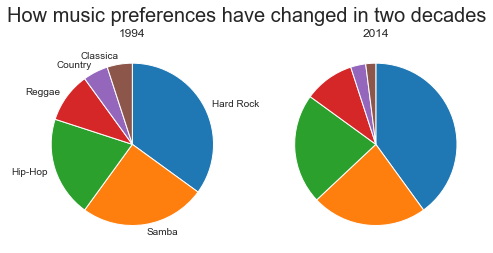

In [3]:
fig, ax = plt.subplots(1,2, figsize = (8,4))
ax[0].pie(music_df[1994], labels=music_df.index, startangle=90, counterclock=False)
ax[1].pie(music_df[2014], startangle=90, counterclock=False);
ax[0].set_title('1994');ax[1].set_title('2014')
fig.suptitle('How music preferences have changed in two decades', fontsize = 20);

If what you need to show is comparing figures, do not give your reader a hard time by choosing a plot type that makes it difficult to compare the corresponding values.

## Illustrative example 1: See the trend (continue)

Can you see how music preference has changed with the slope chart?

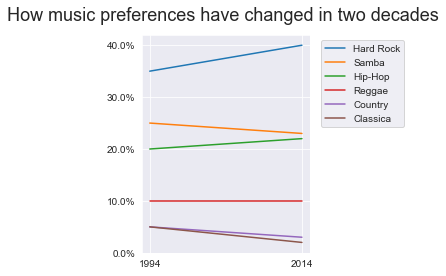

In [4]:
fig, ax = plt.subplots(figsize = (3,4))
music_df.T.plot(ax = ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticks([1994, 2014]); ax.set_yticks(np.arange(0, 0.45, 0.1))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.suptitle('How music preferences have changed in two decades', fontsize=18);

* Readers do not even need to read the y axis to find out whether a trend is up / down for each genre with this visualisation!

## Encode the data data

Mapping data into visual properties:

<center><img src="figs/perception_2.png" width="400"/></center>

Figure from the truthful art. Which one to use?

## How to find the right graphic form?

Think about the message you want to convey. Do you want to show:
* Changes across time or compare different groups?
* General impression? 
* Reveal relationships?

## Graphs that enable accurate judgement vs reveal general patterns

<center><img src="figs/perception.png" width="350"/></center>

Figure from the truthful art. 

## Illustrative example 2

To have some idea of the most important words in the given article:

In [5]:
import collections
import string 

text = '''Novak Djokovic willing to miss tournaments over vaccine.
Novak Djokovic has said he would rather miss out on future tennis trophies than be forced to get a Covid vaccine.
Speaking exclusively to the BBC, he said missing competitions, such as the French Open, over his jab status was "the price that I'm willing to pay".
The 20-time Grand Slam winner was deported from Australia last month after the government cancelled his visa in a row over his vaccine status.
Djokovic described the conditions while he was detained as "very hard".
He said he had not spoken out in the media at the time - despite wanting to - as he wanted to respect the legal process and the Australian Open.
The world's number one men's tennis player also said he should not be associated with the anti-vax movement, but supported an individual's right to choose.
He said he had obtained a medical exemption to enter the country to play in the Australian Open as he had recently recovered from Covid-19.
However, the country's immigration minister, Alex Hawke, personally cancelled the 34-year-old's visa, on the grounds that his presence could incite "civil unrest" and encourage anti-vaccine sentiment.
"I was never against vaccination," he told the BBC, confirming he'd had vaccines as a child, "but I've always supported the freedom to choose what you put in your body."
'''

## Illustrative example 2: with word cloud

Word cloud: Importance of each word is shown with font size or colour. Below only size depends on word frequency:

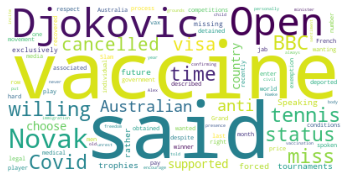

In [6]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
plt.imshow(wc)
plt.axis("off");

This plot provides a general idea of the most important words in the given article and aesthetically pleasing, but it is difficult to compare the word counts between different tokens.

## Illustrative example 2: Data pre-processing

For simplicity, here we do not lemmatise or stem the words:

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

sw = stopwords.words('English')
from nltk.tokenize import word_tokenize
word_count = collections.Counter()
for one_word in word_tokenize(text.lower()):
    one_word = one_word.strip(string.punctuation)
    if len(one_word) and one_word not in sw:
        word_count[one_word] += 1

## Illustrative example 2: with bar chart

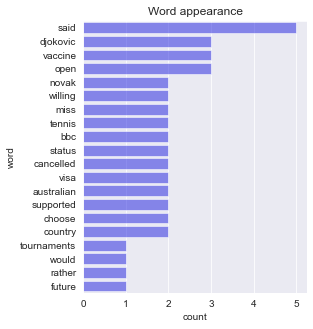

In [8]:
top_20 = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])
plt.subplots(figsize=(4,5))
plt.title('Word appearance')
sns.barplot(x='count', y='word', data = top_20, color='blue', alpha=0.5);

This plot enables us to compare the word counts for each token easily and accurately, but it is not particularly attractive.

## Takeaway

* Choose the graphic form that _suits_ your need, which is not necessary the one that enables accurate estimates
* Multiple graphic forms may enable multiple tasks
    * E.g. If you want to show both general impression of the important words and at the same time allow readers to compare the word count easily and accurately, use _both_ charts

## Arrange the graphic components 

Arrange the components of the graph to make it easier for audience to extract the meaning you want to show. For example:
* Re-grouping the variables and categories 
* Reorder bars in a bar chart
    * e.g. PS5 Q2 to show which department has the highest percentage of online lecture teaching
* Changing the scale
    * e.g. log-log scale used in week 10


All plots should also be self-contained with the use of axis labels, title, etc.

## Illustrative example 3: Ads influence

Suppose you have the following data related to advertisement influence on purchase:

In [9]:
ads_df = pd.DataFrame({'millennials (14-23)':[74,40,53,40], 
                       'millennials (24-29)':[71,45,53,42], 
                       'generation X (30-46)':[72,49,55,42], 
                       'baby bloomers (47-65)':[65,55,45,36], 
                       'matures (66+)':[56,55,50,25]}, 
                      index = ['TV', 'newspaper', 'magazine', 'radio'])
ads_df

,millennials (14-23),millennials (24-29),generation X (30-46),baby bloomer (47-65),matures (66+)
TV,74,71,72,65,56
newspaper,40,45,49,55,55
magazine,53,53,55,45,50
radio,40,42,42,36,25


How should we visualise it?

## Ads influence (continue)

Showing which platform is the most influential in each age group:

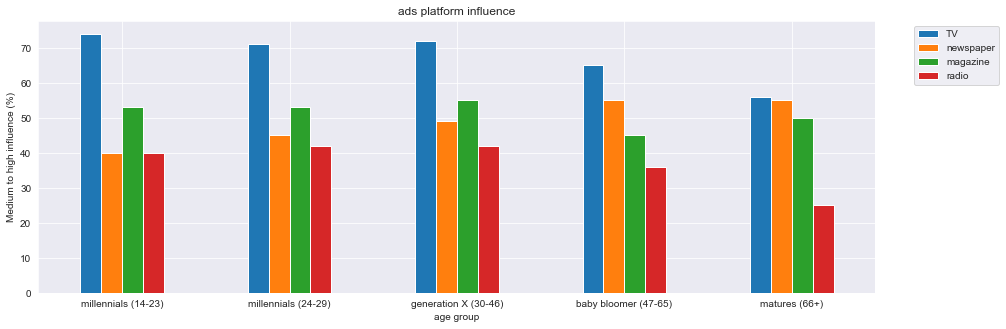

In [10]:
ads_df.T.plot.bar(rot=0, ylabel='Medium to high influence (%)', xlabel='age group', 
                  title='ads platform influence', figsize=(15,5));
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

The tallest bar in each group represents the most influential platform in that group.

## Ads influence (continue)

If you want to show for each platform, which age group it is the most influential:

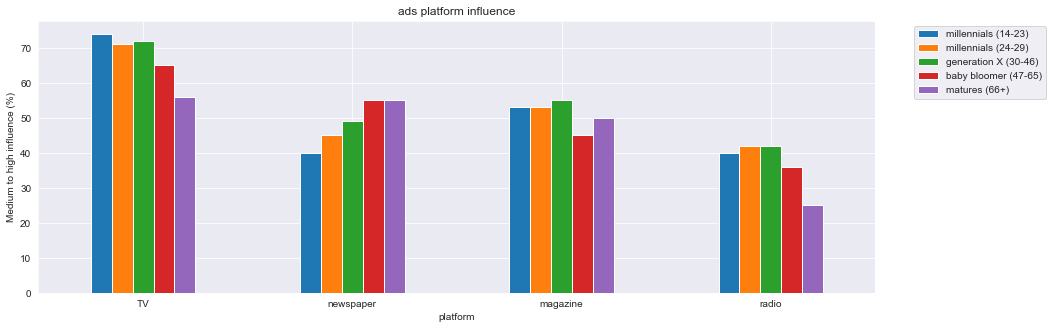

In [11]:
ads_df.plot.bar(rot=0, ylabel='Medium to high influence (%)', xlabel='platform', 
                title='ads platform influence', figsize=(15,5));
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

The tallest bar in each platform represents the age group that it is the most influential when comparing with other age groups.

## Ads influence (continue)

If you want to show the trend of different platforms over the age of audience:

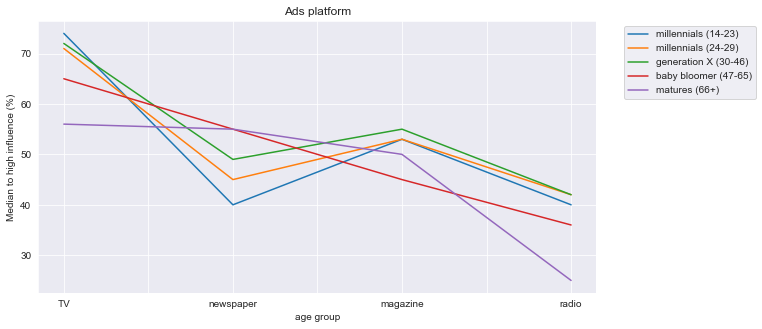

In [12]:
ads_df.plot(ylabel='Medium to high influence (%)', xlabel='age group', 
            title='Ads platform', figsize=(10,5))
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");

Note the x-axis is showing ordinal variables - you can read the sign (positive or negative) of the slope of the lines, but be careful when interpreting the slope of the lines.

## Visualise popular news platform data (continue)

Note that all three charts can show
* Which platform is the most influential in each age group
* For each platform, which age group it is the most influential
* The trend of different platforms across the age groups

But each of them is more effective than others in showing one of the aspects of the data.

## Organise your plot: Original data or difference?

Here we use the following example to illustrate:

In [13]:
income_df = pd.DataFrame({'income':[4600, 5400, 4500, 4900, 5100, 3400, 4400, 3900, 
                                    4400, 5700, 3200, 3000],
                          'expenses': [3200, 4100, 3000, 2100, 4200, 4300, 4700, 3000,
                                       2100, 3300, 3200, 5200]},
                         index = pd.Series(pd.date_range("2000-01-01", periods=12, freq="M")))
income_df.head()

,income,expenses
2000-01-31,4600,3200
2000-02-29,5400,4100
2000-03-31,4500,3000
2000-04-30,4900,2100
2000-05-31,5100,4200


## Original data or difference? (continue)

Which plot is better? It depends!

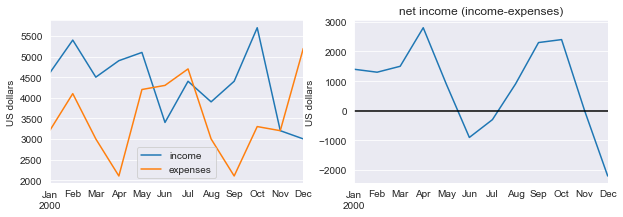

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,3))
income_df.plot(ylabel='US dollars', ax=ax[0]); 
(income_df['income']-income_df['expenses']).plot(title='net income (income-expenses)', 
                                                 ylabel='US dollars', ax=ax[1])
plt.axhline(y=0, color='black', linestyle='-');

Note 
* Left plot is better if you want to show the income and expenses separately. Right plot is better if you want to show the difference
* Line plot does not necessarily need 0-baseline, but you may want to highlight 0 for the right plot

## Handling scale of data

Data can be in a very different magnitude which makes the plot difficult to read. Possible solutions:
* Set the scale of axes 
    * E.g. Log-log plot used in Week 10
* Create more than one plot, each with its own scale to "zoom in" the data 

<center><img src="figs/show_details.png" width="500"/></center>

Figure from the truthful art.

## Keep it simple

* Avoid _chartjunk_
    * Chart junk: all visual elements in charts that are not needed to comprehend the information represented on the charts, or that distract the audience from this information
* Maximise data-ink ratio
    * data-ink ratio = data ink / total ink used in graphic

## Keep it simple: example

Which one is better?

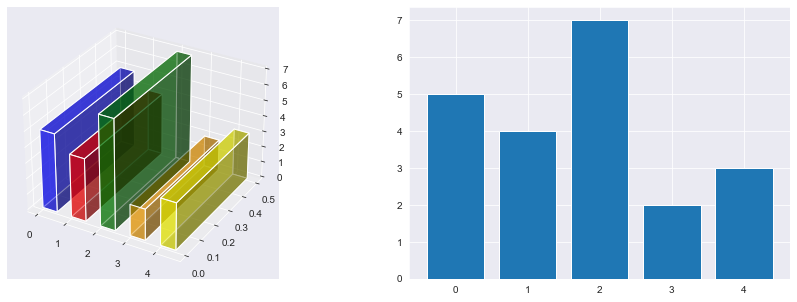

In [15]:
xpos = np.arange(0, 5) 
ypos = zpos = np.zeros(5)
dx = dy = np.full(5, 0.5) 
dz = [5, 4, 7, 2, 3]

fig = plt.figure(figsize=(15,5))
ax_1 = fig.add_subplot(121, projection='3d'); ax_2 = fig.add_subplot(122)

ax_1.bar3d(xpos,ypos,zpos,dx,dy,dz, color=['blue', 'red', 'green', 'orange', 'yellow'], 
           alpha=0.5)
ax_2.bar(xpos, dz);

## Maximise data-ink ratio

<center><img src="figs/ink.png" width="400"/></center>

Figure from [IDRC](https://www.idrc.ca/sites/default/files/sp/Documents%20EN/10-data-visualization-tips-en.pdf).

## Use captions and annotations to guide your audience

Why you may want to use captions and annotations to guide the audience?
* All you want to show may not be clear solely by the plot
* Audience may not interpret the plot in the way you want them to

## Using annotation in matplotlib: Coronavirus cases

Load in the data:

In [16]:
from datetime import datetime 
cases_df = pd.read_csv('data/cases.csv', parse_dates=['date'], index_col=3)
cases = cases_df.newCasesBySpecimenDate.sort_index()
cases.name = 'new cases'
cases.head()

date
2020-01-30    2.0
2020-01-31    0.0
2020-02-01    0.0
2020-02-02    0.0
2020-02-03    0.0
Name: new cases, dtype: float64

## Coronavirus cases (continue)

What is the plot about?

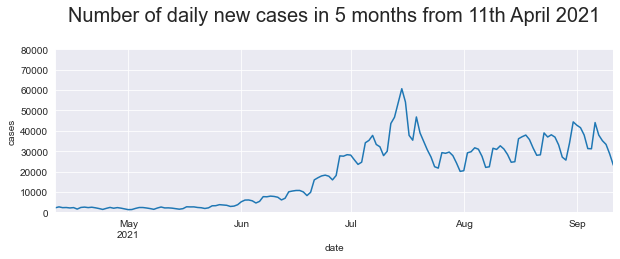

In [17]:
fig, ax = plt.subplots(figsize=(10,3))
cases['2021-04-11':'2021-09-11'].plot(ylim=(0, 80000), ylabel='cases')
# caption
plt.title('Number of daily new cases in 5 months from 11th April 2021\n', fontsize=20);

## Coronavirus cases vs Euro 2020

For exploratory purpose:

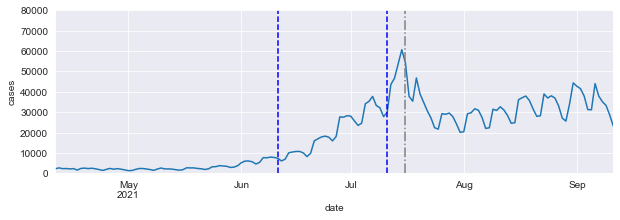

In [18]:
fig, ax = plt.subplots(figsize=(10,3))
cases['2021-04-11':'2021-09-11'].plot(ylim=(0, 80000), ylabel='cases')
plt.axvline(x=datetime(2021, 6, 11), color='b', linestyle='--')
plt.axvline(x=datetime(2021, 7, 11), color='b', linestyle='--')
plt.axvline(x=datetime(2021, 7, 11+5), color='gray', linestyle='-.');

## Coronavirus cases vs Euro 2020 (continue)

With annotation for explanatory purpose:

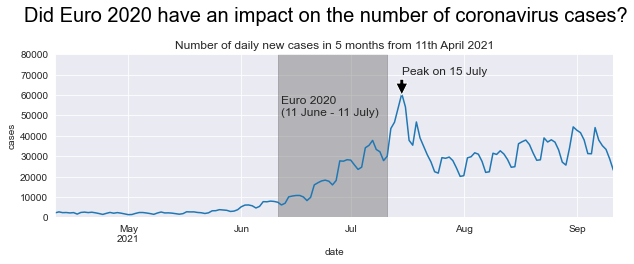

In [46]:
fig, ax = plt.subplots(figsize=(10,3))
cases['2021-04-11':'2021-09-11'].plot(ylim=(0, 80000), ylabel='cases')
# caption
plt.suptitle('Did Euro 2020 have an impact on the number of coronavirus cases?\n', 
             y=1.1, fontsize=20, color='black')
plt.title('Number of daily new cases in 5 months from 11th April 2021')
# annotate
plt.axvspan(datetime(2021, 6, 11),datetime(2021, 7, 11), color='grey', alpha=0.5)
plt.annotate('Euro 2020 \n(11 June - 11 July)', fontsize=12,
             xy=(datetime(2021,6,12), 50000))
plt.annotate('Peak on 15 July', xytext=(datetime(2021,7,15), 70000), fontsize=12,
             xy=(datetime(2021,7,15), 60000), arrowprops=dict(facecolor='black', 
                                                              shrink=0.001));

## Use captions to guide your audience

Captions make the plot comprehensive and self-contained. Depending on what you want to achieve, caption can:
* Describe what has been plotted
* Draw attention to important part of the data / insights
* Describe conclusions drawn from the graph

Again, all depending on what you want to show. 

## Coronavirus cases vs Euro2020 (continue)

With another "guided" caption:

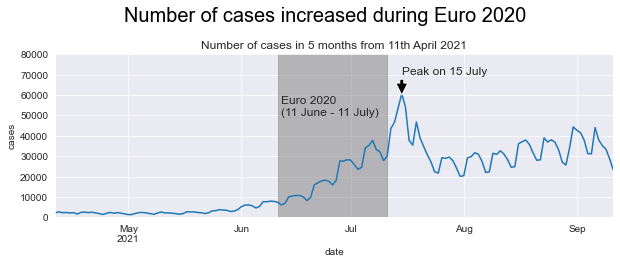

In [20]:
fig, ax = plt.subplots(figsize=(10,3))
cases['2021-04-11':'2021-09-11'].plot(ylim=(0, 80000), ylabel='cases');
plt.suptitle('Number of cases increased during Euro 2020', 
             y=1.1, fontsize=20, color='black')
plt.title('Number of cases in 5 months from 11th April 2021')
plt.axvspan(datetime(2021, 6, 11),datetime(2021, 7, 11), color='grey', alpha=0.5)
plt.annotate('Euro 2020 \n(11 June - 11 July)', xy=(datetime(2021,6,12), 50000), 
             fontsize=12)
plt.annotate('Peak on 15 July', xytext=(datetime(2021,7,15), 70000), fontsize=12,
             xy=(datetime(2021,7,15), 60000), 
             arrowprops=dict(facecolor='black', shrink=0.001));

## Use annotation to guide your audience

Annotation can be used to point out things audience should look at or be aware of. For example to highlight:
* Outliers or interesting data point in a scatter plot
* Interesting patterns
* Some relevant dates in a time series plot

## Using annotation in matplotlib: Bike rental data

Load the data:

In [21]:
bike_df = pd.read_csv('data/day.csv')
bike_df['workingday'] = bike_df['workingday'].astype('category')
bike_df['workingday'] = bike_df['workingday'].cat.\
    rename_categories({0: 'non-working day', 1: 'working day'})
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,non-working day,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,non-working day,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Bike rental data (continue)

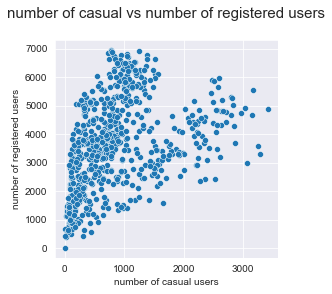

In [22]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x='casual', y='registered', data=bike_df, ax=ax)
ax.set_xlabel('number of casual users'); ax.set_ylabel('number of registered users')
ax.set_title('number of casual vs number of registered users\n', fontsize = 15);

## Bike rental data (continue)

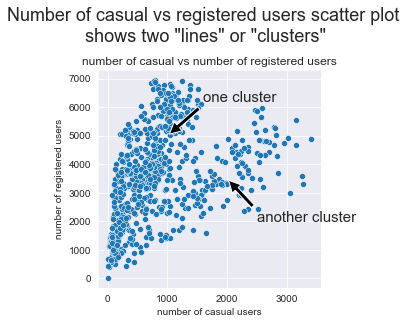

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x='casual', y='registered', data=bike_df, ax=ax)
ax.set_xlabel('number of casual users'); ax.set_ylabel('number of registered users')
ax.annotate('another cluster', xytext=(2500, 2000), fontsize = 15,
            xy=(2000, 3500), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('one cluster', xytext=(1600, 6200), fontsize = 15,
            xy=(1000, 5000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('number of casual vs number of registered users')
plt.suptitle('''Number of casual vs registered users scatter plot
shows two "lines" or "clusters"\n''', fontsize = 18, y=1.1);

## Bike rental data (continue)

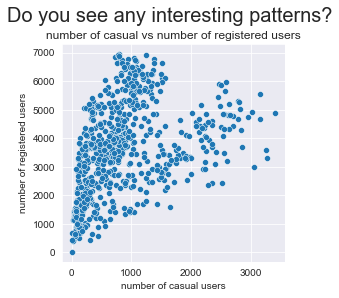

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x='casual', y='registered', data=bike_df, ax=ax)
ax.set_xlabel('number of casual users'); ax.set_ylabel('number of registered users')
plt.title('number of casual vs number of registered users')
plt.suptitle('Do you see any interesting patterns?', fontsize = 20, y=1.01);

## Note on annotating plots and providing suptitle via matplotlib

* [`annotate()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html): Annotate the given point with text
* [`axvspan()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html): Add a vertical span (rectangle) across the axes
* [`axhspan()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhspan.html): Add a horizontal span (rectangle) across the axes
* [`axvlines()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline): Add a vertical line
* [`axhlines()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline): Add a horizontal line
* [`suptitle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html): Add a suptitle

## Example use of `axhlines()` and `annotate()`

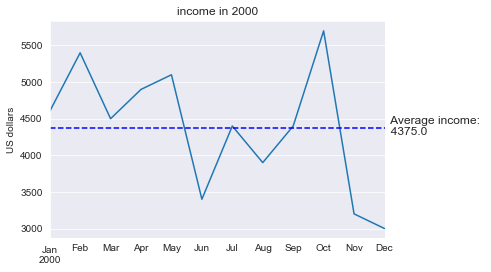

In [44]:
income_df['income'].plot(ylabel='US dollars', title='Income in 2000'); 
plt.axhline(y=income_df['income'].mean(), color='b', linestyle='--');
plt.annotate(f'  Average income: \n  {income_df["income"].mean()}', 
             xy=(datetime(2000,12,31), income_df['income'].mean()-100), 
             fontsize = 12, 
             annotation_clip=False); # annotation outside the plot

## Mini summary: Do not bury the lead

Do not bury the lead! Readers should see what you want to show clearly.
* Your readers do not want to spend cognitive effort to understand your charts
* Choose the graphic form and arrange the graphic components to make it easier for them to see what you want to show
* Point out what they should look at by using captions and annotations
* ...

# GitHub

## GitHub

GitHub provides Internet hosting for software development and _version control_ using _Git_.
* It is the largest development platform in the world
* Millions of developers and companies build, ship, and maintain their software on GitHub
    * Companies: [Meta](https://github.com/facebook), [Google](https://github.com/google)
    * Packages: [NumPy](https://github.com/numpy/numpy), [Pandas](https://github.com/pandas-dev/pandas), [NetworkX](https://github.com/networkx),...

## Plan

* Version control - what it is and why it is useful
* Git
* GitHub: Understand the GitHub features that we have been using 

## Version control 

Version control is the practice of tracking and managing changes to computer programs, documents, or other collections of information.
* Some version control examples:
    * Book editions (e.g. different editions of [`Python for Data analysis`](https://www.oreilly.com/search/?query=Python%20for%20Data%20Analysis&extended_publisher_data=true&highlight=true&include_assessments=false&include_case_studies=true&include_courses=true&include_playlists=true&include_collections=true&include_notebooks=true&include_sandboxes=true&include_scenarios=true&is_academic_institution_account=false&source=user&sort=relevance&facet_json=true&json_facets=true&page=0&include_facets=true&include_practice_exams=true))
    * [Wikipedia page history](https://en.wikipedia.org/w/index.php?title=Version_control&action=history)
    * Software versions (e.g pandas versions on [official page](https://pandas.pydata.org/docs/whatsnew/index.html) or [GitHub](https://github.com/pandas-dev/pandas/tags))
    
In this lecture, we focus on version control for software development. 


## Version control system

Version control systems (VCSs) are tools used to track changes to source code (or other collections of files and folders). VCSs enable workflow and project management in software development.

* Keep all the revisions / snapshots of a project
* Save changes over time without overwriting previous versions
* Track what is changed between each revision / snapshot
    * Including metadata like who made the changes, when the changes were made and comments about the changes
* Manage different versions of the same program
    * Provide tools to compare and merge different versions

## Why version control?

Consider the following situations:
* Hard drive died, all stored work and documents are gone
* Accidentally deleted important files
* Trying to "improve" the program but realise the previous work is better

In these situations, you wish you will have some ways to:
* Get / revert back to previous "workable" version 
* Figure out what has changed from the previous version

## Why version control? (continue)

Consider the following situations when working on a project with other people:
* Different people working on the same document, resulted in several versions or conflicted copy of the same document
    * Often we need to merge the file manually which is time consuming and likely to make mistakes
* Someone made some changes to the document, but not sure why such change is made, or who made the change

In these situations, you wish you will have some ways to:
* Compare and merge different versions / conflicts 
* Have some information about who made the changes, when the changes were made and comments about the changes

## Version control: Advantages

* Allow users to revert to previous versions of a project when needed
* Facilitate trouble-shooting issues by checking what files have been modified and what changes were made before and after the program fails
* Work on parallel branches of development, isolate your work until it is ready
    * E.g. develop new features after the product is launched
    
Version control reduces the risk of losing your work.

## Version control: Advantages (continue)

* Facilitate collaboration
    * Master copy available to the team
    * Help to resolve conflicts when merging contributions from multiple sources
    * Communicate on why certain changes were made
    * Find out who wrote the code and who made the changes

## Examples of version control systems

Some examples of VCSs:
* Git
* Subversion (SVN)
* CVS, Monotone, BitKeeper, Perforce, ...

In this lecture we will only talk about Git, which is the VCS used in GitHub. 

## Git vs GitHub

Git and GitHub are different.
* Git is a version control system
* GitHub is a hosting service for Git repositories
    * [GitLab](https://about.gitlab.com) for example is another hosting service for Git repositories

## GitHub in this course

* We have been using GitHub for coursework submission and code sharing (lecture materials)
* We have been using several features (mainly via GitHub Desktop):
    * Clone
    * Commit (with comments)
    * Push
    
We will now learn about the Git/GitHub features we used in each step of the homework submission procedure.

## GitHub: Clone

<center><img src="figs/clone.png" width="500"/></center>

## GitHub: Local repository after clone

<center><img src="figs/local_copy.png" width="500"/></center>

## GitHub workflow: Clone and local repository

[Clone](https://github.com/git-guides/git-clone): create a copy of a specific repository.

<center><img src="figs/clone_wf.png" width="500"/></center>

## GitHub: Local file change

<center><img src="figs/file_change.png" width="500"/></center> 

## GitHub workflow: Local file change 

<center><img src="figs/file_change_wf.png" width="500"/></center> 

Note the file in the remote repository is not changed.

## GitHub: Commit

<center><img src="figs/commit_w_comment.png" width="500"/></center> 

## GitHub workflow: Commit 

[Commit](https://github.com/git-guides/git-commit): create a _commit_ or a _snapshot_ of the repository. You can also consider it as a "save" point (that you can roll back to).

<center><img src="figs/commit_wf.png" width="500"/></center> 

Note the file in the remote repository is not changed. 

## GitHub: Push

<center><img src="figs/push.png" width="500"/></center> 

## GitHub: Push (continue)

<center><img src="figs/push_remote.png" width="500"/></center> 

## GitHub workflow: Push

[Push](https://github.com/git-guides/git-push): upload all local commits to the corresponding remote repository.

<center><img src="figs/push_wf.png" width="500"/></center> 

## GitHub: Remote change

<center><img src="figs/remote_change.png" width="500"/></center> 

## GitHub: Remote change

<center><img src="figs/remote_change_wf.png" width="500"/></center> 

Note the file in the local computer is not changed.

## GitHub: Pull

<center><img src="figs/pull.png" width="500"/></center> 

## GitHub: Pull

[Pull](https://github.com/git-guides/git-pull): update the current local working directory.

<center><img src="figs/pull_wf.png" width="500"/></center> 

## Snapshots 

Every time you commit, Git takes a snapshot of what all your files look like at that moment and stores a reference to that snapshot. For example:

<center><img src="figs/ghd_snapshots.png" width="500"/></center> 

## Snapshots (continue)

<center><img src="figs/snapshots_illustrations.png" width="500"/></center> 

* Allow us to 
    * Go back to previous commits, prevent losing changes
    * Compare different commits
* Contain metadata: Comments, who made the changes, when the changes were made, etc.

## GitHub repository

A repository contains:
* All of the project files 
* Each file's revision history

## GitHub: Collaboration

<center><img src="figs/collaboration.png" width="500"/></center> 

## GitHub: Collaboration example

Pandas GitHub page: 
<center><img src="figs/pandas_snapshots.png" width="500"/></center> 

We can see different people commit and modify the remote repository.

## More GitHub features: Pull requests

While in this course we use pull requests for providing students feedback, in real world pull requests are used for developers to notify team members that they have completed some features.
* It allows the team to discuss the proposed changes before integrating them into the remote repository
* It also allows people outside of the organisation to contribute
* Example:

<center><img src="figs/pull_requests.png" width="500"/></center> 


## More GitHub features: Issues

Issues are often used for reporting bugs and requesting features. Example:

<center><img src="figs/issues.png" width="500"/></center> 

If you encounter some issue with a package, `Issues` page is a good place to try to get the solution.

## GitHub: Mini summary

* Version control
* Git/GitHub terminologies: Clone, Commit, Push, Pull
* Some other features: Pull requests, Issues
* Main features we did not cover: Merge, Branch